In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('tire.tif', cv2.IMREAD_GRAYSCALE)

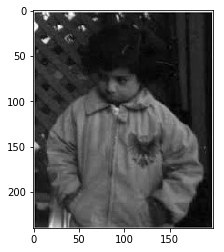

In [3]:
plt.imshow(img, cmap = 'gray')

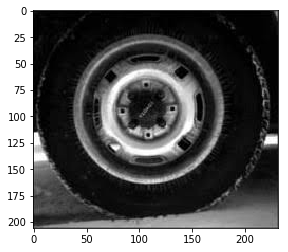

In [4]:
plt.imshow(img2, cmap = 'gray')

# NEGATIVE

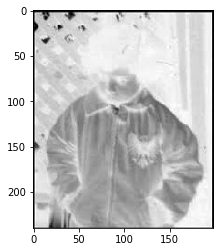

In [5]:
def neg(img):
    m=img.shape[0]
    n=img.shape[1]
    for i in range(m):
        for j in range(n):
            img[i,j]=255-img[i,j]
    
    return img
        
plt.imshow(neg(img), cmap = 'gray')  


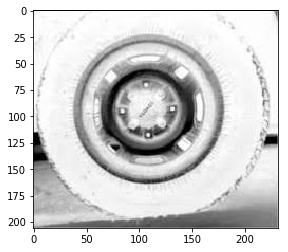

In [6]:
plt.imshow(neg(img2), cmap = 'gray')

#                                      LOGARITHM

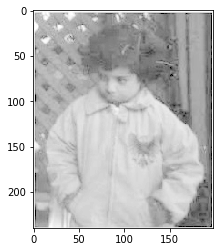

In [7]:
c=30
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('tire.tif', cv2.IMREAD_GRAYSCALE)
def logarithm(img):
    m=img.shape[0]
    n=img.shape[1]
    for i in range(m):
        for j in range(n):
            img[i,j]=c*np.log(img[i,j]+1)
    return img

plt.imshow(logarithm(img.copy()), cmap = 'gray')


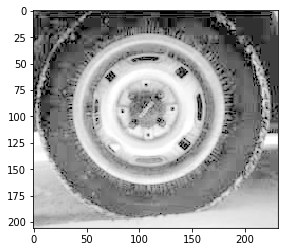

In [8]:
plt.imshow(logarithm(img2.copy()), cmap = 'gray')

# GAMMA

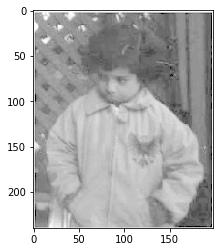

In [9]:
c=10
g=0.3
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('tire.tif', cv2.IMREAD_GRAYSCALE)
def power(img):
    m=img.shape[0]
    n=img.shape[1]
    for i in range(m):
        for j in range(n):
            img[i,j]=c*(img[i,j]**g)
    return img

plt.imshow(power(img.copy()), cmap = 'gray')


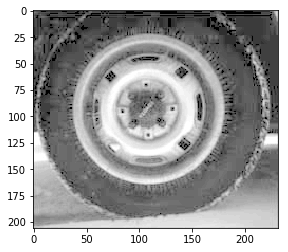

In [10]:
plt.imshow(power(img2.copy()), cmap = 'gray')

# 2D CONVOLUTION- MATRIX METHOD

In [11]:
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
def fn(i,j,l,k):
    if(i>=0 and i<l and j>=0 and j<k):
        return 1
def con(img,kernel,x,y,cx,cy):
    m=kernel.shape[0]
    n=kernel.shape[1]
    l=img.shape[0]
    k=img.shape[1]
    
    res=0
    for index1,i in enumerate(range(x,x+m)):
        for index2,j in enumerate(range(y,y+n)):
            if(fn(i,j,l,k)):
                res+=img[i,j]*kernel[index1,index2]
    return res

array([[1256.,  776.,  821., ...,  799.,  785., 1271.],
       [ 854.,  159.,  211., ...,  110.,  242.,  786.],
       [ 904.,  -44., -331., ..., -594.,  265.,  789.],
       ...,
       [1112.,   80., -328., ..., -713.,  694.,  793.],
       [1012., -127., -652., ..., -882.,  446.,  853.],
       [1334.,  703.,  367., ...,  200.,  963., 1262.]])

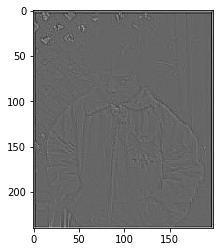

In [12]:

def conv(img,kernel):
    m=img.shape[0]
    n=img.shape[1]
    image=np.zeros((m,n))
    x=1
    y=1
    
    for i in range(m):
        for j in range(n):
            image[i,j]=con(img,kernel,i-x,j-y,x,y)
    return image  


op=conv(img,kernel)
plt.imshow(op, cmap = 'gray')  

op

# AVERAGE


array([[106.88888889, 156.88888889, 150.22222222, ..., 155.55555556,
        155.33333333, 103.55555556],
       [160.33333333, 235.33333333, 225.33333333, ..., 233.33333333,
        233.        , 155.33333333],
       [160.33333333, 235.33333333, 225.33333333, ..., 233.33333333,
        233.        , 155.33333333],
       ...,
       [159.55555556, 233.66666667, 223.77777778, ..., 231.66666667,
        230.77777778, 153.55555556],
       [161.77777778, 239.11111111, 232.        , ..., 238.11111111,
        238.        , 158.55555556],
       [108.44444444, 161.33333333, 157.88888889, ..., 162.44444444,
        162.77777778, 108.55555556]])

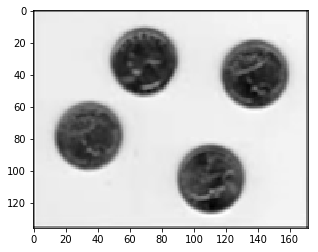

In [13]:
img = cv2.imread('eight.tif', cv2.IMREAD_GRAYSCALE)
kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])*(1/9)
op=conv(img,kernel)
plt.imshow(op, cmap = 'gray')  
op

# WEIGHTED AVERAGE

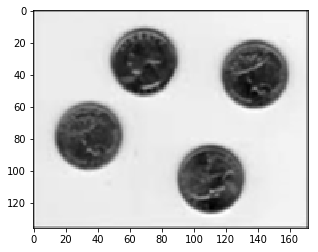

In [14]:
img = cv2.imread('eight.tif', cv2.IMREAD_GRAYSCALE)
kernel=np.array([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
op=conv(img,kernel)
plt.imshow(op, cmap = 'gray')  

In [16]:
op


array([[138.    , 174.75  , 168.9375, ..., 174.9375, 174.75  , 131.0625],
       [184.    , 233.    , 225.25  , ..., 233.25  , 233.    , 174.75  ],
       [184.    , 233.    , 225.25  , ..., 233.25  , 233.    , 174.75  ],
       ...,
       [183.1875, 231.5   , 223.    , ..., 230.5   , 229.375 , 171.75  ],
       [183.9375, 236.1875, 230.6875, ..., 237.5625, 237.5   , 177.8125],
       [139.6875, 182.1875, 180.4375, ..., 184.8125, 185.4375, 138.875 ]])